In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt

### Helping Implementation

In [2]:
def split_data(df, percentage=.75):
    df = df.sample(frac=1)
    T = int(len(df)*percentage)
    return df[:T], df[T:]

In [3]:
def accuracy_score(Y,y):
    return np.sum(Y==y)/len(y)

### Read Data

In [4]:
df = pd.read_csv('../Datasets/iris_dataset.csv')

In [5]:
df_train, df_test = split_data(df)

In [6]:
X_train, y_train = df_train[df.columns[:-1]].values , df_train[df.columns[-1]].values
X_test, y_test = df_test[df.columns[:-1]].values , df_test[df.columns[-1]].values

### Algorithm

In [7]:
sigmoid = lambda x: 1/(1+np.exp(-x))

In [8]:
binary_cross_entropy = lambda y_desired, y ,m: (-1/m)*(np.sum((y_desired.T*np.log2(y)) + ((1-y_desired.T)*(np.log2(1-y)))))

In [9]:
def weight_initialization(n_features):
    w, b = np.zeros((1,n_features)), 0
    return w,b

In [10]:
def model_optimize(w, b, X, Y):
    #Gradient Descent
    m = len(X)
    #Prediction
    y_computed = sigmoid(w @ X.T + b)
    error = binary_cross_entropy(Y,y_computed, m)
    
    #Gradient calculation
    dw = (1/m)*(X.T @ (y_computed - Y.T).T)
    db = (1/m)*(np.sum(y_computed - Y.T))
    grads = {"dw": dw, "db": db}
    return grads, error

In [11]:
def model_predict(w, b, X, Y, lr, iters):
    errors = []
    for i in range(iters):
        grads, error = model_optimize(w,b,X,Y)
        dw = grads["dw"]
        db = grads["db"]
        #weight update
        w = w - lr * dw.T
        b = b - lr * db
        if (i % 100 == 0):
            errors.append(error)
    #final parameters
    coeff = {"w": w, "b": b}
    gradient = {"dw": dw, "db": db}
    return coeff, gradient, errors

In [12]:
def predict(final_pred, m):
    y_pred = np.zeros((1,m))
    for i in range(final_pred.shape[1]):
        if final_pred[0][i] > 0.5:
            y_pred[0][i] = 1
    return y_pred

### Training

In [13]:
n_features = X_train.shape[1]

w, b = weight_initialization(n_features)

coefficients, gradient, errors = model_predict(w, b, X_train, y_train, lr=0.0001, iters=4500)

w = coefficients ["w"]
b = coefficients ["b"]

final_train_pred = sigmoid(w @ X_train.T+b)
final_test_pred = sigmoid(w @ X_test.T+b)

### Evaluation

In [14]:
m_tr =  X_train.shape[0]
m_ts =  X_test.shape[0]

y_tr_pred = predict(final_train_pred, m_tr)
print('Training Accuracy',accuracy_score(y_tr_pred.T, y_train))

y_ts_pred = predict(final_test_pred, m_ts)
print('Test Accuracy',accuracy_score(y_ts_pred.T, y_test))

Training Accuracy 36.0
Test Accuracy 14.0


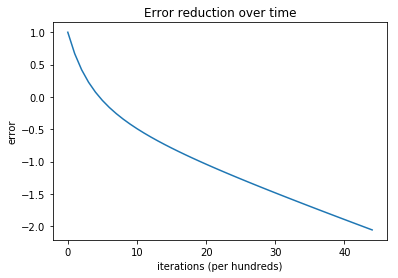

In [15]:
plt.plot(errors)
plt.ylabel('error')
plt.xlabel('iterations (per hundreds)')
plt.title('Error reduction over time')
plt.show()